<a href="https://colab.research.google.com/github/juyounLee/Tensorflow2.0/blob/main/6_4_VGGNet_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# load the data

fashion = tf.keras.datasets.fashion_mnist
(train_X, train_y), (test_X, test_y) = fashion.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(train_X.shape)
print(test_X.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [8]:
# build the model

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32,
                                                    padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64, padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=256, padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=256, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 256)        

In [9]:
history = model.fit(train_X, train_y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5708 - accuracy: 0.7956 - val_loss: 0.3467 - val_accuracy: 0.8720
Epoch 2/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3658 - accuracy: 0.8679 - val_loss: 0.2709 - val_accuracy: 0.8981
Epoch 3/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3225 - accuracy: 0.8833 - val_loss: 0.2488 - val_accuracy: 0.9093
Epoch 4/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2982 - accuracy: 0.8929 - val_loss: 0.2380 - val_accuracy: 0.9124
Epoch 5/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2808 - accuracy: 0.8993 - val_loss: 0.2201 - val_accuracy: 0.9207
Epoch 6/25
1407/1407 [==============================] - 11s 7ms/step - loss: 0.2717 - accuracy: 0.9026 - val_loss: 0.2288 - val_accuracy: 0.9174
Epoch 7/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2603 - accuracy: 0.9060 - val_loss: 0.2114 - val_ac

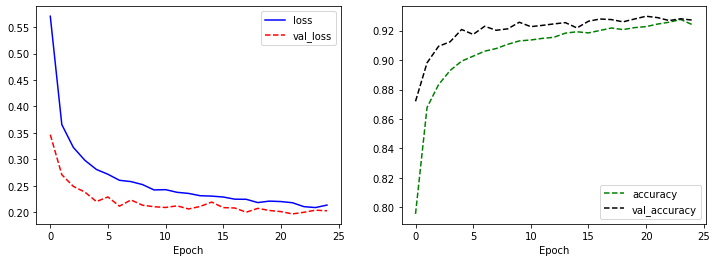

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g--', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

In [14]:
model.evaluate(test_X, test_y, verbose=0)

[0.22590851783752441, 0.9221000075340271]